[View in Colaboratory](https://colab.research.google.com/github/contractorwolf/tensorflow-irisdataset/blob/master/Keras_Offer_Binary_Predictor_With_Correlation.ipynb)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #plotting
import io
import seaborn as sns #graphing

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# show full frames of data
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)


%matplotlib inline 

# show full frames of data
pd.set_option('display.max_columns', None)  

Using TensorFlow backend.


In [0]:
# USE THIS TO AUTHORIZE IMPORT FILE FROM GOOGLE DRIVE
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
# THIS WILL GRAB FILE FROM GOOGLE DRIVE BY ID
file_id = '1UBd1nmuXsVYb8XVFcDMP55Mom5M0zTO9'
downloaded = drive.CreateFile({'id': file_id})



print("CSV FILE LOADED FROM GOOGLE DRIVE")

CSV FILE LOADED FROM GOOGLE DRIVE


In [0]:
#*** NOT NEEDED, USE ABOVE METHOD

# USE THIS TO GRAB FILE FROM LOCAL COMPUTER INSTEAD OF GOOGLE DRIVE
from google.colab import files

csv_file='clean_offer_data.csv'

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

In [11]:
# get full dataset from local CSV file

csv_file = io.StringIO(downloaded.GetContentString())

df = pd.read_csv(csv_file)
df.head()

,Unnamed: 0,consumer_age,referral_count,amount_requested,total_cashout_amount,mortgage_account_age,other_mortgage_balance,age_of_oldest_tradeline,total_monthly_payments,total_late_payments,credit_score,mortgage_ltv,auto_active_accounts,auto_age_of_oldest,auto_closed_accounts,auto_late_payments,auto_ltv,auto_total_balance,auto_total_remaining_months,credit_card_utilization,auto_total_value,credit_card_active_accounts,credit_card_age_of_oldest,credit_card_age,credit_card_closed_accounts,credit_card_late_payments,credit_card_overall_balance,credit_card_overall_limit,credit_card_total_accounts,total_open_accounts,total_closed_accounts,total_credit_utilization,mortgage_total_value,mortgage_active_accounts,mortgage_age_of_newest,mortgage_age_of_oldest,total_negative_marks,total_inquiries_last_6_months,total_inquiries_last_2_years,total_derogatory_accounts,total_delinquent_accounts,total_balances,total_available_credit,student_loan_total_value,student_loan_total_remaining_months,mortgage_amount_requested,mortgage_closed_accounts,mortgage_current_balance,mortgage_late_payments,mortgage_total_balance,mortgage_total_remaining_months,personal_loan_account_age,personal_loan_ltv,student_loan_ltv,property_present_market_value,ontime_payment_percentage,present_ltv_percent,late_30_day_count,personal_loan_late_payments,personal_loan_closed_accounts,personal_loan_active_accounts,personal_loan_age_of_oldest,personal_loan_total_balance,personal_loan_total_remaining_months,student_loan_late_payments,student_loan_closed_accounts,student_loan_active_accounts,student_loan_age_of_oldest,student_loan_age_of_newest,student_loan_total_balance,late_60_day_count,late_90_day_count,targusgrade,fha_eligible_flag,bankruptcy,foreclosure,offer_flag
0,0,59,5,350001.0,0,0,0,201,632,0,709,0.00,0,0,0,0,0.00,0,0,0.82,0,7,200,77,5,0,25034,30700,12,7,5,0.810000,0,0,0,0,0,0,0,0,0,25034,30700.0,0,0,350001.0,0,350001.0,0,0,0,0,0.00,0.00,450000,100.0,77.7780,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,NEVER,NEVER,1
1,1,50,2,600001.0,0,32,0,201,3448,0,785,0.95,1,14,0,0,0.83,19278,60,0.06,23168,4,201,94,6,0,4413,71500,10,7,6,2.650000,680000,1,32,32,0,0,2,0,0,669022,252000.0,0,0,600001.0,0,600001.0,0,645331,329,0,0.00,0.00,2000000,100.0,30.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,NEVER,NEVER,0
2,3,61,5,140001.0,0,135,0,248,2731,6,722,0.81,2,44,3,1,0.65,37042,137,0.06,57110,5,222,147,4,1,479,8230,9,9,12,0.058202,177422,1,135,135,0,0,0,0,0,194853,8230.0,0,0,140001.0,2,140001.0,4,143474,226,7,0.92,0.00,160000,99.0,87.5006,6,0,1,1,7,13858,66,0,2,0,0,0,0,0,0,1,1,NEVER,NEVER,1
3,4,52,5,475001.0,200000,25,0,265,5924,0,737,0.89,0,0,0,0,0.00,0,0,0.60,0,10,265,158,9,0,81037,134870,19,12,12,4.140000,558000,2,16,35,0,0,3,0,0,575861,138870.0,0,0,475001.0,3,275001.0,0,494824,345,0,0.00,0.00,1500000,100.0,18.3334,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,NEVER,NEVER,1
4,5,84,2,300001.0,0,82,0,265,3225,2,693,0.83,0,0,0,0,0.00,0,0,0.26,0,6,265,92,4,2,11469,43324,10,9,7,5.640000,302500,2,62,102,2,15,27,0,0,264538,46829.0,6315,78,300001.0,3,300001.0,0,250153,259,0,0.00,0.19,400000,100.0,75.0003,1,0,0,0,0,0,0,0,0,1,180,180,1231,1,0,1,0,NEVER,NEVER,0


In [13]:
labels = df['offer_flag']
features = df.drop(['Unnamed: 0','offer_flag','referral_count'], axis=1)
features.head()

,consumer_age,amount_requested,total_cashout_amount,mortgage_account_age,other_mortgage_balance,age_of_oldest_tradeline,total_monthly_payments,total_late_payments,credit_score,mortgage_ltv,auto_active_accounts,auto_age_of_oldest,auto_closed_accounts,auto_late_payments,auto_ltv,auto_total_balance,auto_total_remaining_months,credit_card_utilization,auto_total_value,credit_card_active_accounts,credit_card_age_of_oldest,credit_card_age,credit_card_closed_accounts,credit_card_late_payments,credit_card_overall_balance,credit_card_overall_limit,credit_card_total_accounts,total_open_accounts,total_closed_accounts,total_credit_utilization,mortgage_total_value,mortgage_active_accounts,mortgage_age_of_newest,mortgage_age_of_oldest,total_negative_marks,total_inquiries_last_6_months,total_inquiries_last_2_years,total_derogatory_accounts,total_delinquent_accounts,total_balances,total_available_credit,student_loan_total_value,student_loan_total_remaining_months,mortgage_amount_requested,mortgage_closed_accounts,mortgage_current_balance,mortgage_late_payments,mortgage_total_balance,mortgage_total_remaining_months,personal_loan_account_age,personal_loan_ltv,student_loan_ltv,property_present_market_value,ontime_payment_percentage,present_ltv_percent,late_30_day_count,personal_loan_late_payments,personal_loan_closed_accounts,personal_loan_active_accounts,personal_loan_age_of_oldest,personal_loan_total_balance,personal_loan_total_remaining_months,student_loan_late_payments,student_loan_closed_accounts,student_loan_active_accounts,student_loan_age_of_oldest,student_loan_age_of_newest,student_loan_total_balance,late_60_day_count,late_90_day_count,targusgrade,fha_eligible_flag,bankruptcy,foreclosure
0,59,350001.0,0,0,0,201,632,0,709,0.00,0,0,0,0,0.00,0,0,0.82,0,7,200,77,5,0,25034,30700,12,7,5,0.810000,0,0,0,0,0,0,0,0,0,25034,30700.0,0,0,350001.0,0,350001.0,0,0,0,0,0.00,0.00,450000,100.0,77.7780,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,NEVER,NEVER
1,50,600001.0,0,32,0,201,3448,0,785,0.95,1,14,0,0,0.83,19278,60,0.06,23168,4,201,94,6,0,4413,71500,10,7,6,2.650000,680000,1,32,32,0,0,2,0,0,669022,252000.0,0,0,600001.0,0,600001.0,0,645331,329,0,0.00,0.00,2000000,100.0,30.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,NEVER,NEVER
2,61,140001.0,0,135,0,248,2731,6,722,0.81,2,44,3,1,0.65,37042,137,0.06,57110,5,222,147,4,1,479,8230,9,9,12,0.058202,177422,1,135,135,0,0,0,0,0,194853,8230.0,0,0,140001.0,2,140001.0,4,143474,226,7,0.92,0.00,160000,99.0,87.5006,6,0,1,1,7,13858,66,0,2,0,0,0,0,0,0,1,1,NEVER,NEVER
3,52,475001.0,200000,25,0,265,5924,0,737,0.89,0,0,0,0,0.00,0,0,0.60,0,10,265,158,9,0,81037,134870,19,12,12,4.140000,558000,2,16,35,0,0,3,0,0,575861,138870.0,0,0,475001.0,3,275001.0,0,494824,345,0,0.00,0.00,1500000,100.0,18.3334,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,NEVER,NEVER
4,84,300001.0,0,82,0,265,3225,2,693,0.83,0,0,0,0,0.00,0,0,0.26,0,6,265,92,4,2,11469,43324,10,9,7,5.640000,302500,2,62,102,2,15,27,0,0,264538,46829.0,6315,78,300001.0,3,300001.0,0,250153,259,0,0.00,0.19,400000,100.0,75.0003,1,0,0,0,0,0,0,0,0,1,180,180,1231,1,0,1,0,NEVER,NEVER


In [15]:
# SKIP THIS UNTIL CATEGORICAL DATA

# for categorical labels only:

#foreclosure_encoder = LabelEncoder()
#foreclosure_encoded = foreclosure_encoder.fit_transform(df.foreclosure)
#foreclosure = to_categorical(foreclosure_encoded)



converted = pd.get_dummies(features)


converted.head()

,consumer_age,amount_requested,total_cashout_amount,mortgage_account_age,other_mortgage_balance,age_of_oldest_tradeline,total_monthly_payments,total_late_payments,credit_score,mortgage_ltv,auto_active_accounts,auto_age_of_oldest,auto_closed_accounts,auto_late_payments,auto_ltv,auto_total_balance,auto_total_remaining_months,credit_card_utilization,auto_total_value,credit_card_active_accounts,credit_card_age_of_oldest,credit_card_age,credit_card_closed_accounts,credit_card_late_payments,credit_card_overall_balance,credit_card_overall_limit,credit_card_total_accounts,total_open_accounts,total_closed_accounts,total_credit_utilization,mortgage_total_value,mortgage_active_accounts,mortgage_age_of_newest,mortgage_age_of_oldest,total_negative_marks,total_inquiries_last_6_months,total_inquiries_last_2_years,total_derogatory_accounts,total_delinquent_accounts,total_balances,total_available_credit,student_loan_total_value,student_loan_total_remaining_months,mortgage_amount_requested,mortgage_closed_accounts,mortgage_current_balance,mortgage_late_payments,mortgage_total_balance,mortgage_total_remaining_months,personal_loan_account_age,personal_loan_ltv,student_loan_ltv,property_present_market_value,ontime_payment_percentage,present_ltv_percent,late_30_day_count,personal_loan_late_payments,personal_loan_closed_accounts,personal_loan_active_accounts,personal_loan_age_of_oldest,personal_loan_total_balance,personal_loan_total_remaining_months,student_loan_late_payments,student_loan_closed_accounts,student_loan_active_accounts,student_loan_age_of_oldest,student_loan_age_of_newest,student_loan_total_balance,late_60_day_count,late_90_day_count,targusgrade,fha_eligible_flag,bankruptcy_01-12_MONTHS,bankruptcy_13-24_MONTHS,bankruptcy_25-36_MONTHS,bankruptcy_37-48_MONTHS,bankruptcy_49-60_MONTHS,bankruptcy_61-72_MONTHS,bankruptcy_NEVER,bankruptcy_NOT_YET_DISCHARGED,bankruptcy_OVER_72_MONTHS,foreclosure_01-12_MONTHS,foreclosure_13-24_MONTHS,foreclosure_25-36_MONTHS,foreclosure_37-48_MONTHS,foreclosure_49-60_MONTHS,foreclosure_61-72_MONTHS,foreclosure_CURRENTLY_IN_FORECLOSURE,foreclosure_NEVER,foreclosure_OVER_72_MONTHS,foreclosure_OVER_84_MONTHS
0,59,350001.0,0,0,0,201,632,0,709,0.00,0,0,0,0,0.00,0,0,0.82,0,7,200,77,5,0,25034,30700,12,7,5,0.810000,0,0,0,0,0,0,0,0,0,25034,30700.0,0,0,350001.0,0,350001.0,0,0,0,0,0.00,0.00,450000,100.0,77.7780,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,50,600001.0,0,32,0,201,3448,0,785,0.95,1,14,0,0,0.83,19278,60,0.06,23168,4,201,94,6,0,4413,71500,10,7,6,2.650000,680000,1,32,32,0,0,2,0,0,669022,252000.0,0,0,600001.0,0,600001.0,0,645331,329,0,0.00,0.00,2000000,100.0,30.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,61,140001.0,0,135,0,248,2731,6,722,0.81,2,44,3,1,0.65,37042,137,0.06,57110,5,222,147,4,1,479,8230,9,9,12,0.058202,177422,1,135,135,0,0,0,0,0,194853,8230.0,0,0,140001.0,2,140001.0,4,143474,226,7,0.92,0.00,160000,99.0,87.5006,6,0,1,1,7,13858,66,0,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,52,475001.0,200000,25,0,265,5924,0,737,0.89,0,0,0,0,0.00,0,0,0.60,0,10,265,158,9,0,81037,134870,19,12,12,4.140000,558000,2,16,35,0,0,3,0,0,575861,138870.0,0,0,475001.0,3,275001.0,0,494824,345,0,0.00,0.00,1500000,100.0,18.3334,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,84,300001.0,0,82,0,265,3225,2,693,0.83,0,0,0,0,0.00,0,0,0.26,0,6,265,92,4,2,11469,43324,10,9,7,5.640000,302500,2,62,102,2,15,27,0,0,264538,46829.0,6315,78,300001.0,3,300001.0,0,250153,259,0,0.00,0.19,400000,100.0,75.0003,1,0,0,0,0,0,0,0,0,1,180,180,1231,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [16]:
# scale data for better results
# so that columns with larger values dont get weighed more
sc = StandardScaler(copy=True, with_mean=True, with_std=True)
scaled_features = pd.DataFrame(sc.fit_transform(converted), columns=list(converted.columns), index=converted.index)
#scaled_features = features

scaled_features.head()

,consumer_age,amount_requested,total_cashout_amount,mortgage_account_age,other_mortgage_balance,age_of_oldest_tradeline,total_monthly_payments,total_late_payments,credit_score,mortgage_ltv,auto_active_accounts,auto_age_of_oldest,auto_closed_accounts,auto_late_payments,auto_ltv,auto_total_balance,auto_total_remaining_months,credit_card_utilization,auto_total_value,credit_card_active_accounts,credit_card_age_of_oldest,credit_card_age,credit_card_closed_accounts,credit_card_late_payments,credit_card_overall_balance,credit_card_overall_limit,credit_card_total_accounts,total_open_accounts,total_closed_accounts,total_credit_utilization,mortgage_total_value,mortgage_active_accounts,mortgage_age_of_newest,mortgage_age_of_oldest,total_negative_marks,total_inquiries_last_6_months,total_inquiries_last_2_years,total_derogatory_accounts,total_delinquent_accounts,total_balances,total_available_credit,student_loan_total_value,student_loan_total_remaining_months,mortgage_amount_requested,mortgage_closed_accounts,mortgage_current_balance,mortgage_late_payments,mortgage_total_balance,mortgage_total_remaining_months,personal_loan_account_age,personal_loan_ltv,student_loan_ltv,property_present_market_value,ontime_payment_percentage,present_ltv_percent,late_30_day_count,personal_loan_late_payments,personal_loan_closed_accounts,personal_loan_active_accounts,personal_loan_age_of_oldest,personal_loan_total_balance,personal_loan_total_remaining_months,student_loan_late_payments,student_loan_closed_accounts,student_loan_active_accounts,student_loan_age_of_oldest,student_loan_age_of_newest,student_loan_total_balance,late_60_day_count,late_90_day_count,targusgrade,fha_eligible_flag,bankruptcy_01-12_MONTHS,bankruptcy_13-24_MONTHS,bankruptcy_25-36_MONTHS,bankruptcy_37-48_MONTHS,bankruptcy_49-60_MONTHS,bankruptcy_61-72_MONTHS,bankruptcy_NEVER,bankruptcy_NOT_YET_DISCHARGED,bankruptcy_OVER_72_MONTHS,foreclosure_01-12_MONTHS,foreclosure_13-24_MONTHS,foreclosure_25-36_MONTHS,foreclosure_37-48_MONTHS,foreclosure_49-60_MONTHS,foreclosure_61-72_MONTHS,foreclosure_CURRENTLY_IN_FORECLOSURE,foreclosure_NEVER,foreclosure_OVER_72_MONTHS,foreclosure_OVER_84_MONTHS
0,0.408492,0.878983,-0.483685,-1.054883,-0.277667,0.068684,-1.005114,-0.447417,0.081925,-1.941799,-0.963608,-0.745064,-0.941868,-0.237129,-1.036824,-0.708952,-0.885233,1.685687,-0.798844,0.104548,0.239232,-0.054962,-0.153890,-0.352170,1.048661,-0.294812,-0.031918,-0.401994,-0.862073,-0.358260,-1.025707,-1.496909,-1.009168,-1.053216,-0.443984,-0.582625,-0.842219,-0.116096,-0.198433,-1.038615,-0.379004,-0.313281,-0.314385,0.878983,-0.932640,1.183773,-0.284989,-0.999675,-1.736304,-0.318392,-0.484397,-0.420840,0.342912,0.229608,0.806667,-0.437344,-0.121727,-0.464329,-0.462306,-0.318338,-0.308278,-0.387510,-0.150761,-0.306121,-0.304091,-0.390146,-0.357960,-0.285394,-0.329423,-0.27907,0.198818,-3.289155,-0.033737,-0.050687,-0.101602,-0.079289,-0.087469,-0.096309,0.226446,-0.005059,-0.109293,-0.01645,-0.017734,-0.039167,-0.032913,-0.036552,-0.042706,-0.003312,0.096599,-0.043599,-0.031374
1,-0.272938,2.525832,-0.483685,-0.466274,-0.277667,0.068684,0.717256,-0.447417,1.271788,0.699189,0.131796,-0.181600,-0.941868,-0.237129,1.224245,0.266051,1.043384,-0.810169,0.064791,-0.496669,0.247131,0.222578,0.039933,-0.352170,-0.433750,0.699688,-0.266358,-0.401994,-0.732402,-0.299784,2.318339,0.043049,-0.414409,-0.495434,-0.443984,-0.582625,-0.420386,-0.116096,-0.198433,2.270800,3.140016,-0.313281,-0.314385,2.525832,-0.932640,2.981716,-0.284989,2.599043,0.800910,-0.318392,-0.484397,-0.420840,5.599090,0.229608,-1.417323,-0.437344,-0.121727,-0.464329,-0.462306,-0.318338,-0.308278,-0.387510,-0.150761,-0.306121,-0.304091,-0.390146,-0.357960,-0.285394,-0.329423,-0.27907,0.198818,0.304029,-0.033737,-0.050687,-0.101602,-0.079289,-0.087469,-0.096309,0.226446,-0.005059,-0.109293,-0.01645,-0.017734,-0.039167,-0.032913,-0.036552,-0.042706,-0.003312,0.096599,-0.043599,-0.031374
2,0.559921,-0.504371,-0.483685,1.428310,-0.277667,0.474911,0.2787

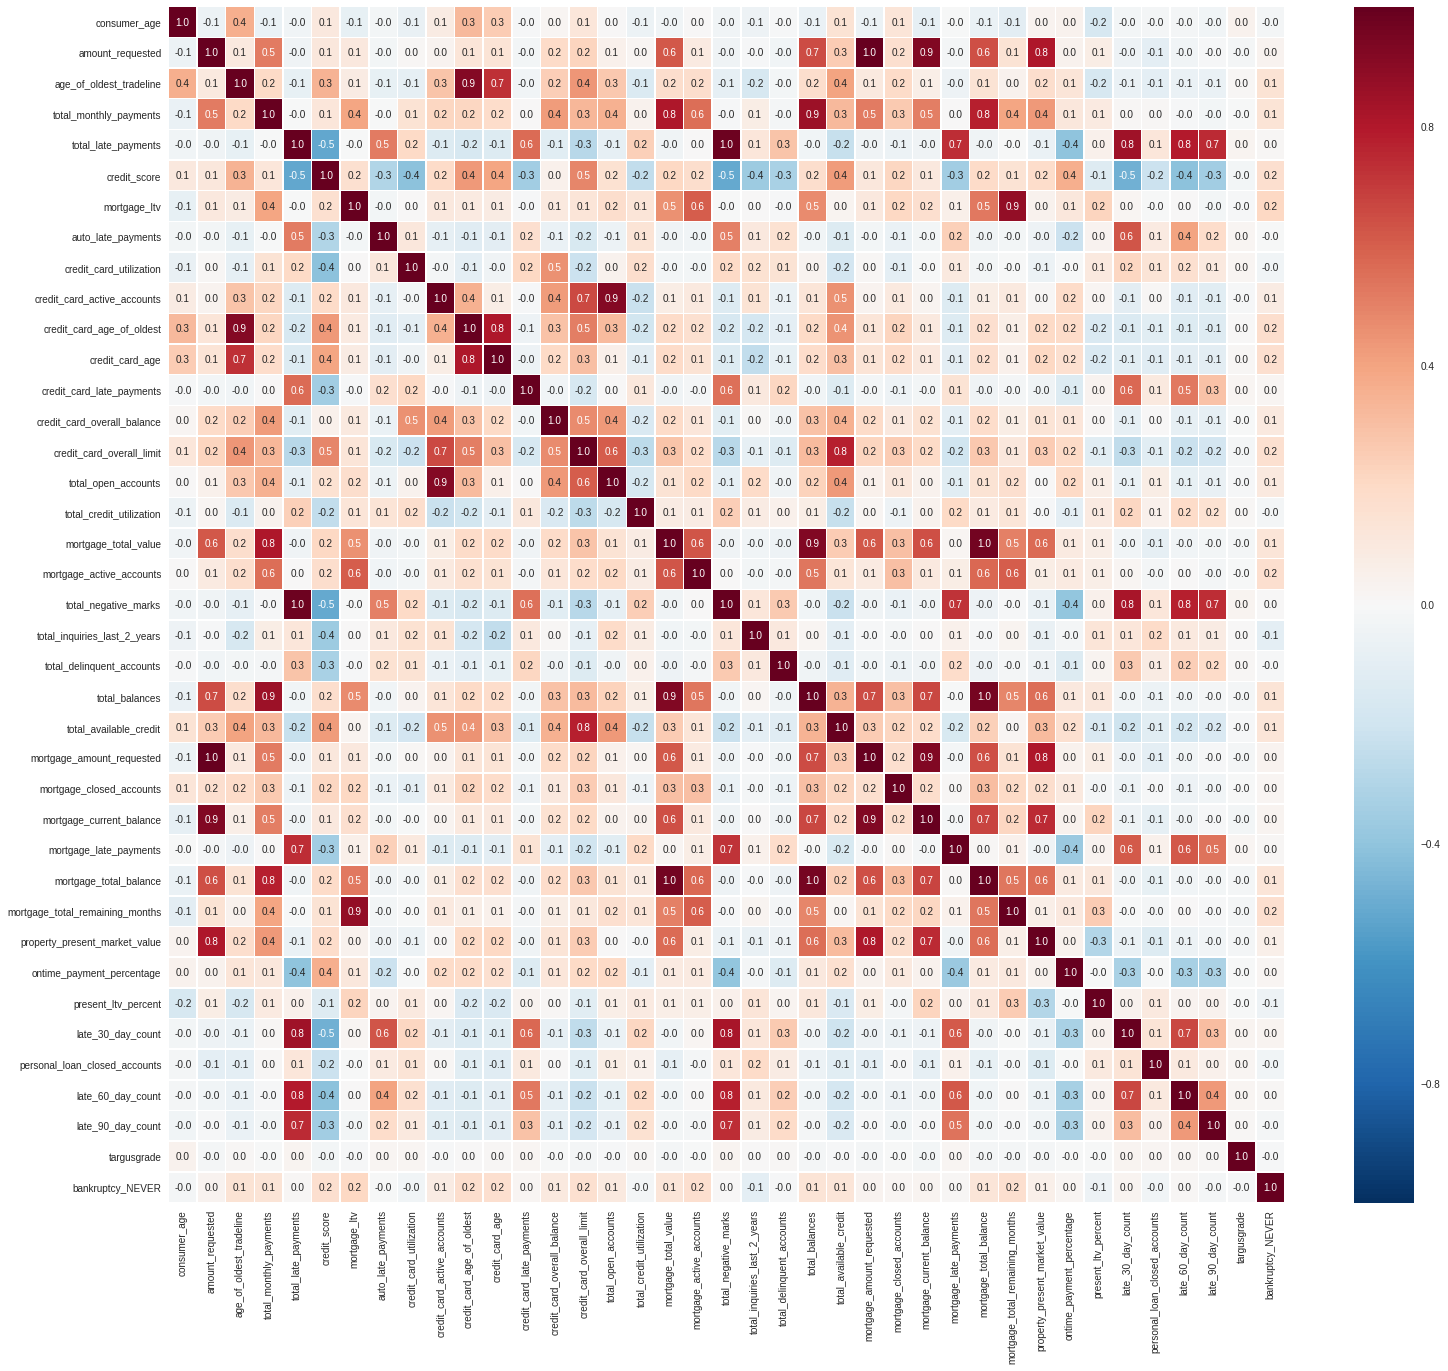

In [0]:
#correlation map
f,ax = plt.subplots(figsize=(25, 22))
sns.heatmap(scaled_features.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [20]:
# show correlation matrix to find the most important features

combined = scaled_features.copy() # copy here so we arent adding y series to original x
combined["offer_flag"] = labels

corr_matrix = combined.corr()
sorted = corr_matrix["offer_flag"].abs().sort_values(ascending=False)
sorted.head(1000)

offer_flag                              1.000000
credit_score                            0.274897
credit_card_overall_limit               0.161484
total_negative_marks                    0.156338
total_late_payments                     0.156138
late_30_day_count                       0.141676
total_available_credit                  0.136218
property_present_market_value           0.133911
late_60_day_count                       0.127253
total_balances                          0.121368
ontime_payment_percentage               0.121158
mortgage_total_value                    0.120512
mortgage_total_balance                  0.120499
mortgage_late_payments                  0.112611
total_delinquent_accounts               0.108840
credit_card_age_of_oldest               0.107173
total_monthly_payments                  0.105062
late_90_day_count                       0.104274
mortgage_current_balance                0.100558
credit_card_age                         0.098008
credit_card_late_pay

In [22]:
correlation_threshold = .7
last_column = ""
best_corr = 0
best_name = ""
correlated_drop_list = []
source = scaled_features

for index, row in source.corr().iterrows():
    i = 0
    
    #row_name = str(index)
    while i < len(source.columns):
        if (row[i] >= correlation_threshold or row[i] <= -correlation_threshold) and str(index)!=source.columns[i]:
            if last_column!=str(index):
                
                if best_name!="":
                    print("LEAVES: " + best_name + " with: " + str(best_corr))  
                
                print("----------------------")  
                last_column = str(index)
                best_corr = sorted[str(index)]
                best_name = str(index)
            print(str(index) + "," + str(sorted[str(index)]) + "," + source.columns[i] + "," + str(sorted[source.columns[i]]) + ",(" + str(row[i]) + ")")
            
            if sorted[source.columns[i]] > best_corr:
                print("DROP: " + best_name)   
                correlated_drop_list.append(best_name)
                best_corr = sorted[source.columns[i]] 
                best_name = source.columns[i]
            else:
                print("DROP: " + source.columns[i])
                correlated_drop_list.append(source.columns[i])
            
            
        i = i + 1
        
print("DROP FOLLOWING FEATURES:")
print(correlated_drop_list)

----------------------
amount_requested,0.08310592987198034,mortgage_amount_requested,0.08310592987198034,(1.0)
DROP: mortgage_amount_requested
amount_requested,0.08310592987198034,mortgage_current_balance,0.10055793816717057,(0.9288324951738394)
DROP: amount_requested
amount_requested,0.08310592987198034,property_present_market_value,0.13391081410476607,(0.8086032437950719)
DROP: mortgage_current_balance
LEAVES: property_present_market_value with: 0.13391081410476607
----------------------
mortgage_account_age,0.025601180775058047,mortgage_age_of_newest,0.029433328107734066,(0.9763496878389054)
DROP: mortgage_account_age
mortgage_account_age,0.025601180775058047,mortgage_age_of_oldest,0.020739569773302838,(0.9785316999030046)
DROP: mortgage_age_of_oldest
LEAVES: mortgage_age_of_newest with: 0.029433328107734066
----------------------
age_of_oldest_tradeline,0.07359814600732126,credit_card_age_of_oldest,0.10717254523263654,(0.9188766627627347)
DROP: age_of_oldest_tradeline
age_of_oldes

In [23]:
# drop highly correlated features that are less correlated to the target
x_final = scaled_features.drop(correlated_drop_list, axis=1)

x_final.head()

,consumer_age,total_cashout_amount,other_mortgage_balance,credit_score,auto_age_of_oldest,auto_closed_accounts,auto_late_payments,credit_card_utilization,auto_total_value,credit_card_age_of_oldest,credit_card_late_payments,credit_card_overall_balance,credit_card_overall_limit,total_open_accounts,total_credit_utilization,mortgage_active_accounts,mortgage_age_of_newest,total_negative_marks,total_inquiries_last_6_months,total_inquiries_last_2_years,total_derogatory_accounts,total_delinquent_accounts,total_balances,student_loan_total_value,student_loan_total_remaining_months,mortgage_closed_accounts,mortgage_total_remaining_months,property_present_market_value,ontime_payment_percentage,present_ltv_percent,personal_loan_late_payments,personal_loan_closed_accounts,personal_loan_active_accounts,personal_loan_age_of_oldest,personal_loan_total_balance,student_loan_late_payments,student_loan_closed_accounts,student_loan_active_accounts,student_loan_age_of_newest,targusgrade,fha_eligible_flag,bankruptcy_01-12_MONTHS,bankruptcy_13-24_MONTHS,bankruptcy_25-36_MONTHS,bankruptcy_37-48_MONTHS,bankruptcy_49-60_MONTHS,bankruptcy_61-72_MONTHS,bankruptcy_NEVER,bankruptcy_NOT_YET_DISCHARGED,bankruptcy_OVER_72_MONTHS,foreclosure_01-12_MONTHS,foreclosure_13-24_MONTHS,foreclosure_25-36_MONTHS,foreclosure_37-48_MONTHS,foreclosure_49-60_MONTHS,foreclosure_61-72_MONTHS,foreclosure_CURRENTLY_IN_FORECLOSURE,foreclosure_NEVER,foreclosure_OVER_72_MONTHS,foreclosure_OVER_84_MONTHS
0,0.408492,-0.483685,-0.277667,0.081925,-0.745064,-0.941868,-0.237129,1.685687,-0.798844,0.239232,-0.352170,1.048661,-0.294812,-0.401994,-0.358260,-1.496909,-1.009168,-0.443984,-0.582625,-0.842219,-0.116096,-0.198433,-1.038615,-0.313281,-0.314385,-0.932640,-1.736304,0.342912,0.229608,0.806667,-0.121727,-0.464329,-0.462306,-0.318338,-0.308278,-0.150761,-0.306121,-0.304091,-0.357960,0.198818,-3.289155,-0.033737,-0.050687,-0.101602,-0.079289,-0.087469,-0.096309,0.226446,-0.005059,-0.109293,-0.01645,-0.017734,-0.039167,-0.032913,-0.036552,-0.042706,-0.003312,0.096599,-0.043599,-0.031374
1,-0.272938,-0.483685,-0.277667,1.271788,-0.181600,-0.941868,-0.237129,-0.810169,0.064791,0.247131,-0.352170,-0.433750,0.699688,-0.401994,-0.299784,0.043049,-0.414409,-0.443984,-0.582625,-0.420386,-0.116096,-0.198433,2.270800,-0.313281,-0.314385,-0.932640,0.800910,5.599090,0.229608,-1.417323,-0.121727,-0.464329,-0.462306,-0.318338,-0.308278,-0.150761,-0.306121,-0.304091,-0.357960,0.198818,0.304029,-0.033737,-0.050687,-0.101602,-0.079289,-0.087469,-0.096309,0.226446,-0.005059,-0.109293,-0.01645,-0.017734,-0.039167,-0.032913,-0.036552,-0.042706,-0.003312,0.096599,-0.043599,-0.031374
2,0.559921,-0.483685,-0.277667,0.285454,1.025823,0.329125,0.091344,-0.810169,1.330049,0.413001,-0.127659,-0.716559,-0.842518,-0.055668,-0.382152,0.043049,1.499971,-0.443984,-0.582625,-0.842219,-0.116096,-0.198433,-0.165926,-0.313281,-0.314385,0.306252,0.006585,-0.640502,0.072166,1.259238,-0.121727,0.040114,1.089675,0.078529,1.059185,-0.150761,0.412177,-0.304091,-0.357960,0.198818,0.304029,-0.033737,-0.050687,-0.101602,-0.079289,-0.087469,-0.096309,0.226446,-0.005059,-0.109293,-0.01645,-0.017734,-0.039167,-0.032913,-0.036552,-0.042706,-0.003312,0.096599,-0.043599,-0.031374
3,-0.121509,3.524988,-0.277667,0.520295,-0.745064,-0.941868,-0.237129,0.963202,-0.798844,0.752642,-0.352170,5.074629,2.244332,0.463822,-0.252431,1.583007,-0.711789,-0.443984,-0.582625,-0.209469,-0.116096,-0.198433,1.792051,-0.313281,-0.314385,0.925697,0.924300,3.903548,0.229608,-1.960385,-0.121727,-0.464329,-0.462306,-0.318338,-0.308278,-0.150761,-0.306121,-0.304091,-0.357960,0.198818,0.304029,-0.033737,-0.050687,-0.101602,-0.079289,-0.087469,-0.096309,0.226446,-0.005059,-0.109293,-0.01645,-0.017734,-0.039167,-0.032913,-0.036552,-0.042706,-0.003312,0.096599,-0.043599,-0.031374
4,2.301353,-0.483685,-0.277667,-0.168573,-0.745064,-0.941868,-0.237129,-0.153365,-0.798844,0.752642,0.096853,0.073495,0.012898,-0.055668,-0.204761,1.583007,0.143177,-0.261183,7.394954,4.

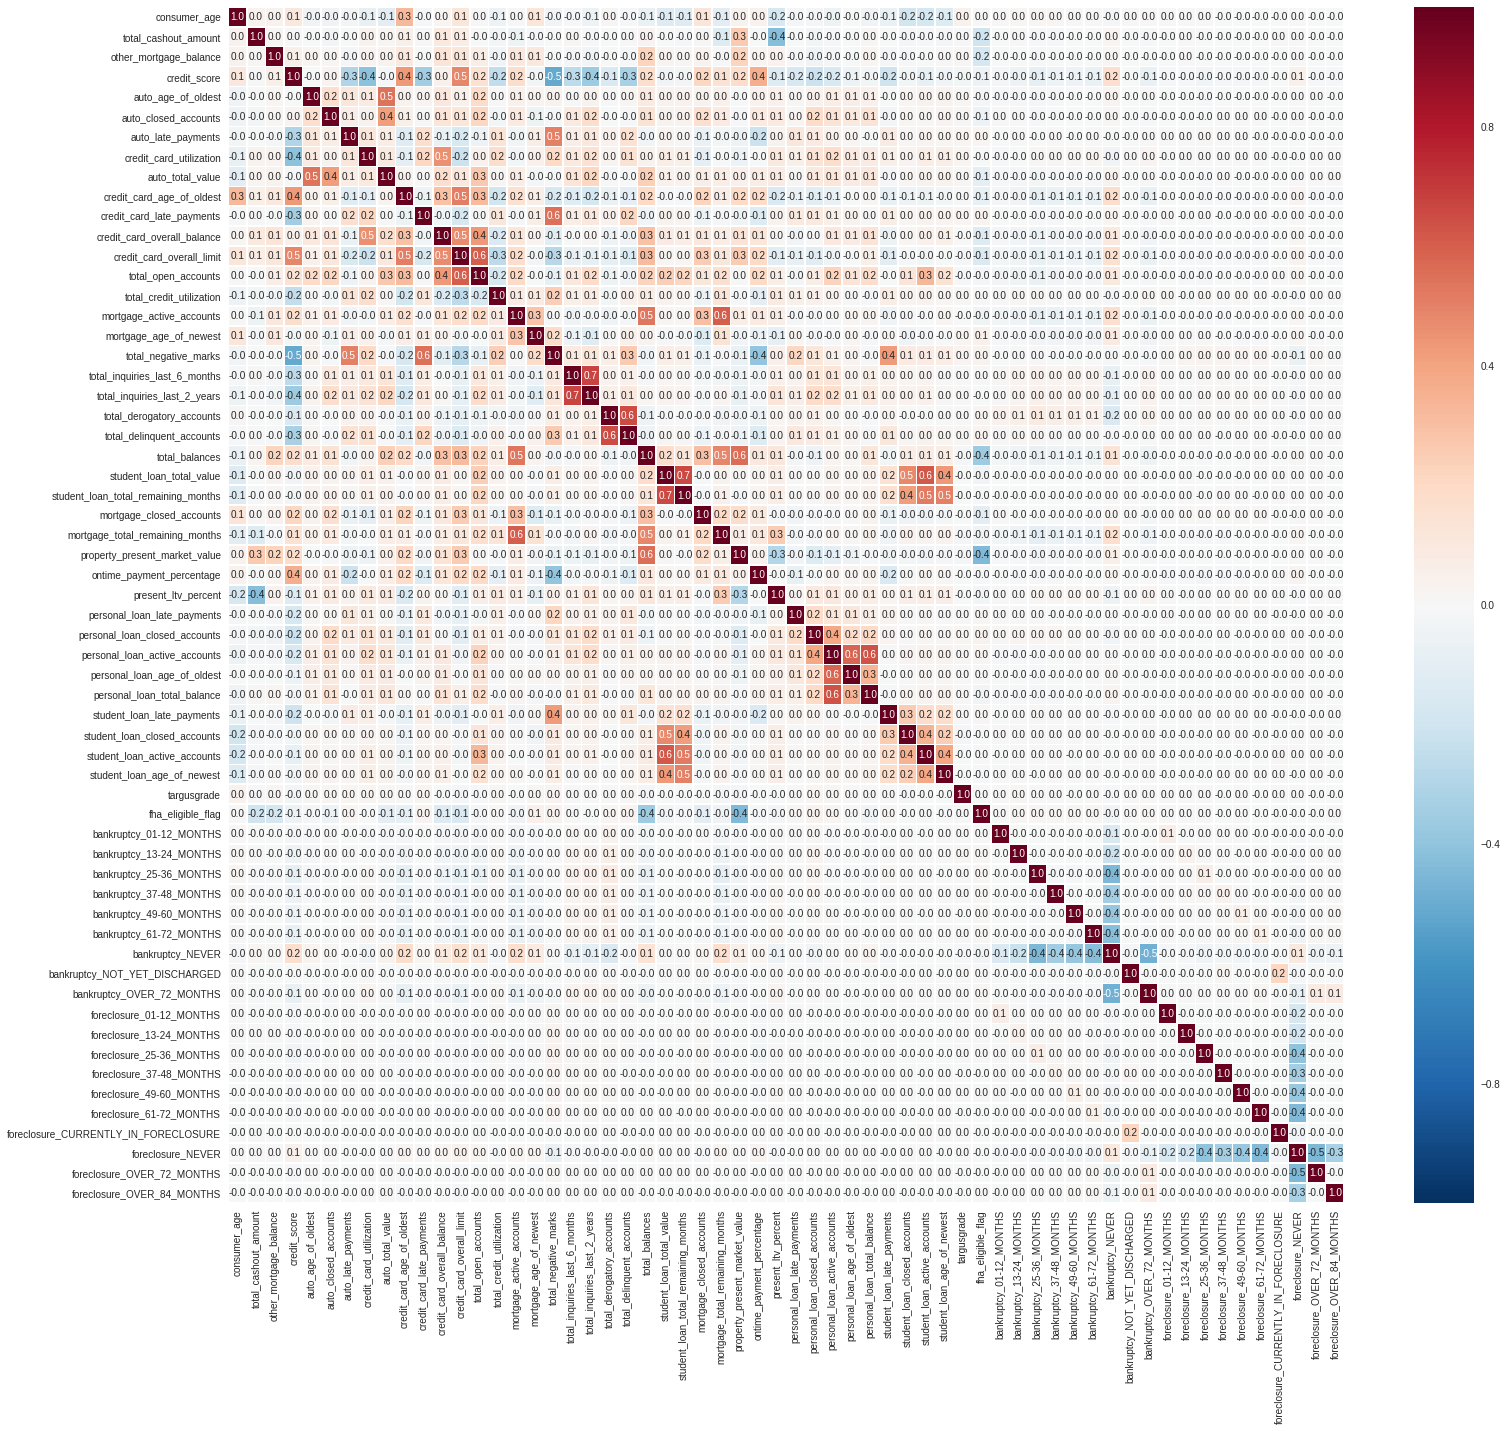

In [35]:
#correlation map
f,ax = plt.subplots(figsize=(25, 22))
sns.heatmap(x_final.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [0]:
train_x, test_x, train_y, test_y = train_test_split(scaled_features, labels, test_size=0.30, random_state=101)

In [0]:
# for inprocess validation
x_val = train_x[:10000]
partial_train_x = train_x[10000:]

y_val = train_y[:10000]
partial_train_y = train_y[10000:]


In [0]:
# create model
classifier = Sequential()
classifier.add(Dense(16, activation='relu', input_shape=(len(scaled_features.columns),)))
classifier.add(Dense(16, activation='relu'))
classifier.add(Dense(1, activation='sigmoid'))

In [0]:
# Compiling Neural Network
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

In [28]:
# Fitting our model 
history = classifier.fit(partial_train_x, partial_train_y, batch_size = 512, epochs = 100, validation_data=(x_val,y_val))

#history = classifier.fit(train_x, train_y, batch_size = 512, epochs = 100)

Train on 181486 samples, validate on 10000 samples
Epoch 1/100
181486/181486 [==============================] - 2s 12us/step - loss: 0.6384 - acc: 0.6332 - val_loss: 0.6117 - val_acc: 0.6576
Epoch 2/100
181486/181486 [==============================] - 2s 9us/step - loss: 0.6096 - acc: 0.6650 - val_loss: 0.6003 - val_acc: 0.6703
Epoch 3/100
181486/181486 [==============================] - 1s 7us/step - loss: 0.5997 - acc: 0.6743 - val_loss: 0.5910 - val_acc: 0.6828
Epoch 4/100
181486/181486 [==============================] - 1s 7us/step - loss: 0.5927 - acc: 0.6798 - val_loss: 0.5868 - val_acc: 0.6881
Epoch 5/100
181486/181486 [==============================] - 1s 7us/step - loss: 0.5877 - acc: 0.6850 - val_loss: 0.5823 - val_acc: 0.6900
Epoch 6/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5838 - acc: 0.6881 - val_loss: 0.5797 - val_acc: 0.6914
Epoch 7/100
111616/181486 [=================>............] - ETA: 0s - loss: 0.5802 - acc: 0.6912

181486/181486 [==============================] - 1s 8us/step - loss: 0.5808 - acc: 0.6911 - val_loss: 0.5776 - val_acc: 0.6921
Epoch 8/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5784 - acc: 0.6926 - val_loss: 0.5771 - val_acc: 0.6915
Epoch 9/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5764 - acc: 0.6946 - val_loss: 0.5751 - val_acc: 0.6976
Epoch 10/100
181486/181486 [==============================] - 2s 8us/step - loss: 0.5746 - acc: 0.6959 - val_loss: 0.5747 - val_acc: 0.6942
Epoch 11/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5732 - acc: 0.6965 - val_loss: 0.5725 - val_acc: 0.6966
Epoch 12/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5719 - acc: 0.6985 - val_loss: 0.5723 - val_acc: 0.6956
Epoch 13/100
177664/181486 [============================>.] - ETA: 0s - loss: 0.5709 - acc: 0.6989

181486/181486 [==============================] - 1s 8us/step - loss: 0.5709 - acc: 0.6988 - val_loss: 0.5709 - val_acc: 0.6983
Epoch 14/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5699 - acc: 0.6996 - val_loss: 0.5708 - val_acc: 0.6993
Epoch 15/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5689 - acc: 0.7003 - val_loss: 0.5704 - val_acc: 0.7008
Epoch 16/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5682 - acc: 0.7000 - val_loss: 0.5692 - val_acc: 0.7018
Epoch 17/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5674 - acc: 0.7004 - val_loss: 0.5687 - val_acc: 0.7037
Epoch 18/100
181486/181486 [==============================] - 1s 7us/step - loss: 0.5666 - acc: 0.7017 - val_loss: 0.5688 - val_acc: 0.7004
Epoch 19/100
181486/181486 [==============================] - 1s 7us/step - loss: 0.5661 - acc: 0.7018 - val_loss: 0.5667 - val_acc: 0.7016
Epoch 20/100
 14848/181486 [=>...

181486/181486 [==============================] - 1s 7us/step - loss: 0.5654 - acc: 0.7021 - val_loss: 0.5665 - val_acc: 0.7019
Epoch 21/100
181486/181486 [==============================] - 2s 8us/step - loss: 0.5650 - acc: 0.7014 - val_loss: 0.5665 - val_acc: 0.7023
Epoch 22/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5644 - acc: 0.7022 - val_loss: 0.5686 - val_acc: 0.7001
Epoch 23/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5639 - acc: 0.7028 - val_loss: 0.5661 - val_acc: 0.7028
Epoch 24/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5635 - acc: 0.7031 - val_loss: 0.5673 - val_acc: 0.7020
Epoch 25/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5630 - acc: 0.7029 - val_loss: 0.5650 - val_acc: 0.7024
Epoch 26/100
151552/181486 [========================>.....] - ETA: 0s - loss: 0.5627 - acc: 0.7037

181486/181486 [==============================] - 1s 8us/step - loss: 0.5627 - acc: 0.7032 - val_loss: 0.5649 - val_acc: 0.7029
Epoch 27/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5624 - acc: 0.7027 - val_loss: 0.5655 - val_acc: 0.7019
Epoch 28/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5620 - acc: 0.7038 - val_loss: 0.5663 - val_acc: 0.6997
Epoch 29/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5618 - acc: 0.7039 - val_loss: 0.5656 - val_acc: 0.6999
Epoch 30/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5614 - acc: 0.7040 - val_loss: 0.5652 - val_acc: 0.7014
Epoch 31/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5612 - acc: 0.7047 - val_loss: 0.5654 - val_acc: 0.7013
Epoch 32/100
181486/181486 [==============================] - 1s 7us/step - loss: 0.5608 - acc: 0.7041 - val_loss: 0.5649 - val_acc: 0.7015
Epoch 33/100
 23040/181486 [==>..

181486/181486 [==============================] - 1s 7us/step - loss: 0.5606 - acc: 0.7048 - val_loss: 0.5640 - val_acc: 0.7021
Epoch 34/100
181486/181486 [==============================] - 1s 7us/step - loss: 0.5602 - acc: 0.7042 - val_loss: 0.5641 - val_acc: 0.7036
Epoch 35/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5601 - acc: 0.7043 - val_loss: 0.5656 - val_acc: 0.7006
Epoch 36/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5599 - acc: 0.7043 - val_loss: 0.5644 - val_acc: 0.7032
Epoch 37/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5597 - acc: 0.7050 - val_loss: 0.5654 - val_acc: 0.7010
Epoch 38/100
181486/181486 [==============================] - 2s 8us/step - loss: 0.5595 - acc: 0.7050 - val_loss: 0.5642 - val_acc: 0.7022
Epoch 39/100
157696/181486 [=========================>....] - ETA: 0s - loss: 0.5597 - acc: 0.7046

181486/181486 [==============================] - 1s 8us/step - loss: 0.5593 - acc: 0.7052 - val_loss: 0.5638 - val_acc: 0.7014
Epoch 40/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5591 - acc: 0.7050 - val_loss: 0.5638 - val_acc: 0.7023
Epoch 41/100
181486/181486 [==============================] - 2s 8us/step - loss: 0.5588 - acc: 0.7049 - val_loss: 0.5638 - val_acc: 0.7030
Epoch 42/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5586 - acc: 0.7050 - val_loss: 0.5638 - val_acc: 0.7017
Epoch 43/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5584 - acc: 0.7048 - val_loss: 0.5629 - val_acc: 0.7041
Epoch 44/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5583 - acc: 0.7054 - val_loss: 0.5626 - val_acc: 0.7044
Epoch 45/100
170496/181486 [===========================>..] - ETA: 0s - loss: 0.5589 - acc: 0.7050

181486/181486 [==============================] - 1s 8us/step - loss: 0.5583 - acc: 0.7055 - val_loss: 0.5647 - val_acc: 0.7025
Epoch 46/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5580 - acc: 0.7055 - val_loss: 0.5634 - val_acc: 0.7047
Epoch 47/100
181486/181486 [==============================] - 1s 7us/step - loss: 0.5579 - acc: 0.7059 - val_loss: 0.5628 - val_acc: 0.7045
Epoch 48/100
181486/181486 [==============================] - 1s 7us/step - loss: 0.5577 - acc: 0.7056 - val_loss: 0.5626 - val_acc: 0.7057
Epoch 49/100
181486/181486 [==============================] - 1s 7us/step - loss: 0.5575 - acc: 0.7059 - val_loss: 0.5631 - val_acc: 0.7041
Epoch 50/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5575 - acc: 0.7060 - val_loss: 0.5630 - val_acc: 0.7022
Epoch 51/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5572 - acc: 0.7056 - val_loss: 0.5632 - val_acc: 0.7035
Epoch 52/100
  7168/181486 [>....

181486/181486 [==============================] - 1s 8us/step - loss: 0.5572 - acc: 0.7055 - val_loss: 0.5636 - val_acc: 0.7041
Epoch 53/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5569 - acc: 0.7066 - val_loss: 0.5628 - val_acc: 0.7047
Epoch 54/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5570 - acc: 0.7061 - val_loss: 0.5624 - val_acc: 0.7055
Epoch 55/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5567 - acc: 0.7068 - val_loss: 0.5611 - val_acc: 0.7054
Epoch 56/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5565 - acc: 0.7070 - val_loss: 0.5616 - val_acc: 0.7053
Epoch 57/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5563 - acc: 0.7064 - val_loss: 0.5620 - val_acc: 0.7044
Epoch 58/100
168448/181486 [==========================>...] - ETA: 0s - loss: 0.5567 - acc: 0.7062

181486/181486 [==============================] - 1s 8us/step - loss: 0.5566 - acc: 0.7063 - val_loss: 0.5641 - val_acc: 0.7040
Epoch 59/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5562 - acc: 0.7068 - val_loss: 0.5621 - val_acc: 0.7030
Epoch 60/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5562 - acc: 0.7067 - val_loss: 0.5619 - val_acc: 0.7035
Epoch 61/100
181486/181486 [==============================] - 1s 7us/step - loss: 0.5560 - acc: 0.7071 - val_loss: 0.5614 - val_acc: 0.7037
Epoch 62/100
181486/181486 [==============================] - 1s 7us/step - loss: 0.5559 - acc: 0.7065 - val_loss: 0.5614 - val_acc: 0.7037
Epoch 63/100
181486/181486 [==============================] - 1s 7us/step - loss: 0.5559 - acc: 0.7070 - val_loss: 0.5611 - val_acc: 0.7050
Epoch 64/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5556 - acc: 0.7070 - val_loss: 0.5616 - val_acc: 0.7053
Epoch 65/100
 20480/181486 [==>..

181486/181486 [==============================] - 1s 8us/step - loss: 0.5554 - acc: 0.7064 - val_loss: 0.5615 - val_acc: 0.7040
Epoch 66/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5556 - acc: 0.7069 - val_loss: 0.5615 - val_acc: 0.7062
Epoch 67/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5554 - acc: 0.7071 - val_loss: 0.5625 - val_acc: 0.7043
Epoch 68/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5551 - acc: 0.7077 - val_loss: 0.5603 - val_acc: 0.7054
Epoch 69/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5551 - acc: 0.7073 - val_loss: 0.5624 - val_acc: 0.7009
Epoch 70/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5551 - acc: 0.7074 - val_loss: 0.5619 - val_acc: 0.7056
Epoch 71/100
168960/181486 [==========================>...] - ETA: 0s - loss: 0.5548 - acc: 0.7073

181486/181486 [==============================] - 1s 8us/step - loss: 0.5549 - acc: 0.7072 - val_loss: 0.5622 - val_acc: 0.7048
Epoch 72/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5549 - acc: 0.7075 - val_loss: 0.5617 - val_acc: 0.7051
Epoch 73/100
181486/181486 [==============================] - 2s 8us/step - loss: 0.5546 - acc: 0.7077 - val_loss: 0.5621 - val_acc: 0.7046
Epoch 74/100
181486/181486 [==============================] - 2s 8us/step - loss: 0.5546 - acc: 0.7083 - val_loss: 0.5616 - val_acc: 0.7047
Epoch 75/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5547 - acc: 0.7080 - val_loss: 0.5620 - val_acc: 0.7039
Epoch 76/100
181486/181486 [==============================] - 1s 7us/step - loss: 0.5546 - acc: 0.7078 - val_loss: 0.5602 - val_acc: 0.7058
Epoch 77/100
181486/181486 [==============================] - 1s 7us/step - loss: 0.5543 - acc: 0.7081 - val_loss: 0.5616 - val_acc: 0.7035
Epoch 78/100
 14336/181486 [=>...

181486/181486 [==============================] - 1s 7us/step - loss: 0.5543 - acc: 0.7079 - val_loss: 0.5612 - val_acc: 0.7030
Epoch 79/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5542 - acc: 0.7083 - val_loss: 0.5603 - val_acc: 0.7040
Epoch 80/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5541 - acc: 0.7082 - val_loss: 0.5608 - val_acc: 0.7040
Epoch 81/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5541 - acc: 0.7081 - val_loss: 0.5611 - val_acc: 0.7060
Epoch 82/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5540 - acc: 0.7081 - val_loss: 0.5611 - val_acc: 0.7041
Epoch 83/100
181486/181486 [==============================] - 2s 8us/step - loss: 0.5540 - acc: 0.7086 - val_loss: 0.5609 - val_acc: 0.7064
Epoch 84/100
145920/181486 [=======================>......] - ETA: 0s - loss: 0.5548 - acc: 0.7080

181486/181486 [==============================] - 1s 8us/step - loss: 0.5538 - acc: 0.7086 - val_loss: 0.5618 - val_acc: 0.7022
Epoch 85/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5539 - acc: 0.7084 - val_loss: 0.5621 - val_acc: 0.7027
Epoch 86/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5539 - acc: 0.7089 - val_loss: 0.5605 - val_acc: 0.7051
Epoch 87/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5538 - acc: 0.7088 - val_loss: 0.5605 - val_acc: 0.7034
Epoch 88/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5538 - acc: 0.7084 - val_loss: 0.5607 - val_acc: 0.7037
Epoch 89/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5537 - acc: 0.7084 - val_loss: 0.5603 - val_acc: 0.7043
Epoch 90/100
181486/181486 [==============================] - 1s 7us/step - loss: 0.5537 - acc: 0.7090 - val_loss: 0.5617 - val_acc: 0.7034
Epoch 91/100
   512/181486 [.....

181486/181486 [==============================] - 1s 7us/step - loss: 0.5535 - acc: 0.7086 - val_loss: 0.5617 - val_acc: 0.7056
Epoch 92/100
181486/181486 [==============================] - 1s 7us/step - loss: 0.5537 - acc: 0.7079 - val_loss: 0.5605 - val_acc: 0.7052
Epoch 93/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5535 - acc: 0.7084 - val_loss: 0.5611 - val_acc: 0.7036
Epoch 94/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5534 - acc: 0.7080 - val_loss: 0.5601 - val_acc: 0.7037
Epoch 95/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5534 - acc: 0.7087 - val_loss: 0.5599 - val_acc: 0.7067
Epoch 96/100
181486/181486 [==============================] - 2s 8us/step - loss: 0.5534 - acc: 0.7089 - val_loss: 0.5601 - val_acc: 0.7035
Epoch 97/100
151552/181486 [========================>.....] - ETA: 0s - loss: 0.5538 - acc: 0.7078

181486/181486 [==============================] - 1s 8us/step - loss: 0.5534 - acc: 0.7083 - val_loss: 0.5599 - val_acc: 0.7064
Epoch 98/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5534 - acc: 0.7086 - val_loss: 0.5608 - val_acc: 0.7067
Epoch 99/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5532 - acc: 0.7088 - val_loss: 0.5607 - val_acc: 0.7045
Epoch 100/100
181486/181486 [==============================] - 1s 8us/step - loss: 0.5532 - acc: 0.7086 - val_loss: 0.5621 - val_acc: 0.7031


In [0]:
history_dict =  history.history
loss_values  = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']


epochs = range(1, len(acc) + 1)

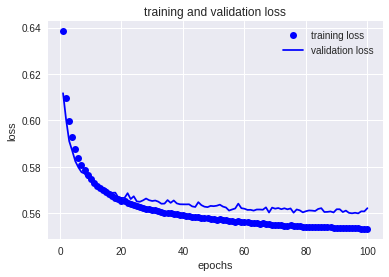

In [30]:
plt.plot(epochs,loss_values,'bo',label='training loss')
plt.plot(epochs,val_loss_values,'b',label='validation loss')
plt.title('training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()


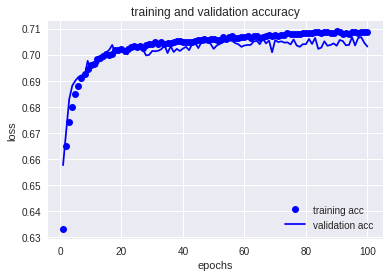

In [31]:

plt.clf()

acc_values  = history_dict['acc']
val_acc_values = history_dict['val_acc']


plt.plot(epochs,acc_values,'bo',label='training acc')
plt.plot(epochs,val_acc_values,'b',label='validation acc')
plt.title('training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

In [32]:
# Predicting the Test set results
y_pred = classifier.predict(test_x)
y_pred = (y_pred > 0.5)


print('OVERALL ACCURACY:', accuracy_score(test_y, y_pred))
print('')
print('CONFUSION MATRIX:')
print(confusion_matrix(test_y, y_pred))


OVERALL ACCURACY: 0.7038359369288134

CONFUSION MATRIX:
[[21045 17019]
 [ 7286 36716]]


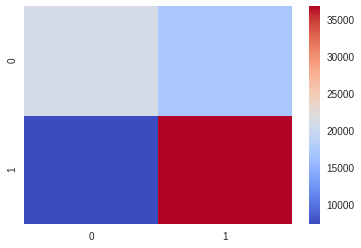

In [34]:
sns.heatmap(confusion_matrix(test_y, y_pred),cbar=True,fmt =' .2f', cmap='coolwarm')